In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset, Subset, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
from sklearn.metrics import accuracy_score

#Initial questions

## Problem 2.1: A Single Artificial Neuron

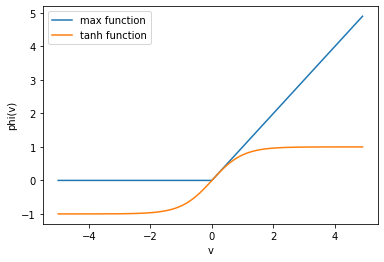

In [2]:
v = torch.arange(-5.0, 5.0, 0.1)

plt.plot(v, torch.maximum(torch.tensor(0.0), v), label="max function")

plt.plot(v, torch.tanh(v), label="tanh function")

plt.xlabel("v")
plt.ylabel("phi(v)")
plt.legend()
plt.show()

A neural network with a single neuron and a single scalar input would have 2 parameters (including the bias)

A neural netowk with a single neuron and a d-dimensional input would have d+1 parameters (including the bias)

## Problem 2.2 Multilayer FANN

In [3]:
num_inputs = 2
num_neurons_1st_layer = 5
num_neurons_2nd_layer = 2
num_outputs = 1
num_parameters = (num_inputs + 1)*num_neurons_1st_layer + (num_neurons_2nd_layer + 1)*num_outputs
print(f'Number of parameters = {num_parameters}')

Number of parameters = 18



```
j: neuron
i: input

X = [1 x1 x2] (1x3)

Uji = [[U10 U20 U30 U40 U50;
        U11 U21 U31 U41 U51;
        U12 U22 U32 U42 U52]] (3x5)

Vji = [[V10 V20;
        V11 V21;
        V12 V22;
        V13 V23;
        V14 V24;
        V15 V25]] (6x2)

wji = [[w10;
        w11;
        w12]] (1x3)

output1 = phi(X*Uji) (1x5)
output1_with_bias (1x6)

output2 = phi(output1_with_bias*Vji) (1x2)
output2_with_bias (1x3)

final_output = phi(output2_with_bias*wji) (1)
```

## Problem 2.3: CNN

a) mxm + 1 (including the bias)

b) (mxm + 1)x2 (including the bias), the number of parameters depends on the size of the kernell and the number of feature maps

## Problem 2.4: The Softmax Layer

In [4]:
v1 = torch.tensor([1.0, 2.0, 4.0])
output1 = torch.nn.functional.softmax(v1, dim=0)
print(f'v1={v1}\nsoftmax(v1)={output1}')
assert abs(1 - torch.sum(output1)) <= 0.00001, 'Sum should be 1'

v1=tensor([1., 2., 4.])
softmax(v1)=tensor([0.0420, 0.1142, 0.8438])


In [5]:
v2 = torch.tensor([1.0, 3.0, 9.0])
output2 = torch.nn.functional.softmax(v2, dim=0)
print(f'v2={v2}\nsoftmax(v2)={output2}')
assert abs(1 - torch.sum(output2)) <= 0.00001, 'Sum should be 1'

v2=tensor([1., 3., 9.])
softmax(v2)=tensor([3.3452e-04, 2.4718e-03, 9.9719e-01])


The softmax function transforms an input vector into an output vector where each element is compressed between 0 and 1 and the sum of all values is 1. This function is used in classification problems where we want a probability for each class.

##Problem 2.5: Average Cross Entropy

In [6]:
def cross_entropy(target, output):
  res = 0
  for i in range(len(output)):
    res += target[i]*torch.log(1/output[i])
  return res

In [7]:
input1 = torch.tensor([0.01, 0.9, 0.09])
target1 = torch.tensor([0.0, 1.0, 0.0])
print(f'Cross Entropy: {round(cross_entropy(target1, input1).item(), 4)}')

Cross Entropy: 0.1054


In [8]:
input2 = torch.tensor([0.8, 0.15, 0.05])
target2 = torch.tensor([1.0, 0.0, 0.0])
print(f'Cross Entropy: {round(cross_entropy(target2, input2).item(), 4)}')

Cross Entropy: 0.2231


## Problem 2.6: RMSE

```
mean squared error -> [kg^2]
RMSE -> [kg]
```

##Problem 2.7: Advantages of Stochastic Gradient Descent

In the Stochastic Gradient Descent, we sum the error of each individual observation and update the model just after each observation (instead of calculating the error after all observations have been evaluated, like in Gradient Descent). As we update it after each observation, we are less likely to get struck in local minima and we are more likely to reach to the minimum faster than Batch Gradient Descent with large dataset.

Check Adam optimizer

## Problem 3.1:

a) As it is a binary classification problem, the output will be a tensor of size 2 with a probability for each class.

b) After obtaining the probability for each class, the method argmax returns the index of the class with the highest probability.

#Task A - 1D Linear and non-linear regression - using simple FANNs

##A1

In [9]:
a_true = 6.0 
b_true = 1.0 
sigma_epsilon = 5.0 

X = np.random.uniform(0, 10, 250) # sample a bunch of #x_n in [0,10]
y_obs = a_true*X + b_true + sigma_epsilon*np.random.randn(len(X)) # linear relationship embedded in zero mean additive gaussian noise

X = torch.tensor(X).reshape(len(X),1).float() # comment about each row being a data-pair
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

In [10]:
y_pred = a_true*X+b_true

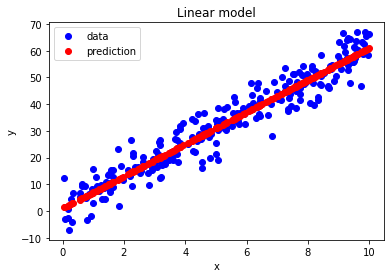

In [11]:
plt.plot(X, y_obs, 'bo', label='data')
plt.plot(X, y_pred.detach().numpy(), 'ro', label='prediction')
plt.title('Linear model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
my_dataset = TensorDataset(X, y_obs)
my_dataloader = DataLoader(my_dataset, batch_size=int(0.1*len(X)), shuffle=True)

In [13]:
# Define neural netowrk model with a single neuron and a single input
model = nn.Linear(in_features=1, out_features=1)

It is a regression problem as the output is numerical, not categorical.

In [14]:
def training(model, data_loader, cost_function, lr, nr_epochs):

  optim = torch.optim.SGD(model.parameters(), lr)

  training_minibatch_Js = []

  for epoch_i in range(nr_epochs):
    for X_batch, y_batch in data_loader:

      y_pred = model(X_batch)

      cost = cost_function(y_pred, y_batch)
      training_minibatch_Js.append(cost.item())
      
      optim.zero_grad()

      cost.backward()

      optim.step()

  plt.figure(figsize=[10, 5])
  plt.plot(training_minibatch_Js)
  plt.xlabel('update step i on mini-batch')
  plt.ylabel('Cost')
  plt.title('Cost during training on train-set (per mini-batch)')
  plt.grid()
  plt.show()

  print(f'Final cost: {round(training_minibatch_Js[-1], 4)}')

In [15]:
def plot_prediction(x, y, y_pred):
  plt.plot(x, y, 'bo', label='data')
  plt.plot(x, y_pred, 'ro', label='prediction')
  plt.title('Prediction vs data')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()

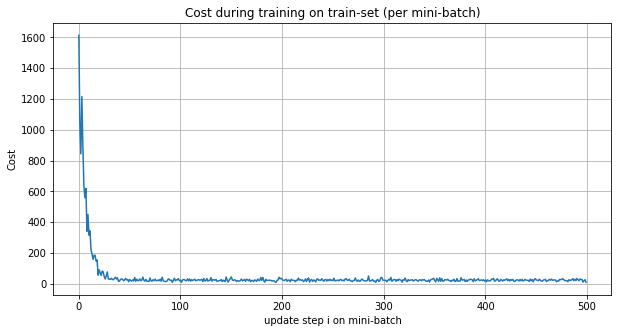

Final cost: 9.986


In [16]:
training(model, my_dataloader, nn.MSELoss(), 0.001, 50)

In [17]:
with torch.no_grad():
  y_preds = model(X)

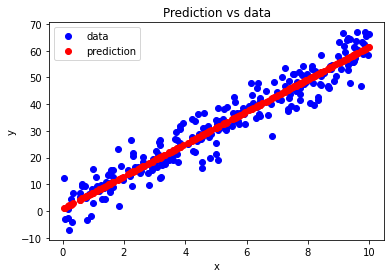

In [18]:
plot_prediction(X, y_obs, y_preds)

In [19]:
# Print all parameters in your neural network model
for p in model.named_parameters():
  print(p)

('weight', Parameter containing:
tensor([[6.0569]], requires_grad=True))
('bias', Parameter containing:
tensor([0.8676], requires_grad=True))


The parameters of the neural network are similar to the coefficients of the real linear function: a=6 and b=1

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
from numpy import genfromtxt # we use this to load data from a csv into a numpy array
DATA_PATH = '/content/drive/MyDrive/datasets/dataset_Marvin_Minsky.csv'
my_data = genfromtxt(DATA_PATH, delimiter=',', skip_header=1) #both x and y are here
X = my_data[:,0] #Extract the x_n
# print(X)
y_obs = my_data[:,1] #ExtracT the y_n
# print(y_obs)

# comment about each row being a data-pair # reshape to make each row in X a data-pint x_n
X = torch.tensor(X).reshape(len(X),1).float()
# turn to column vector, each row corresponds to each y_n
y_obs = torch.tensor(y_obs).reshape(len(y_obs),1).float()

my_dataset = TensorDataset(X, y_obs) # create dataset by turning tensors into datasets objects
my_dataloader = DataLoader(my_dataset, batch_size=40, shuffle=True) # create your data

In [22]:
torch.manual_seed(2) # set random state in order to obtain the same regression

In [23]:
# ANN architecture
model = nn.Sequential(
  nn.Linear(in_features=1, out_features=5),
  nn.ReLU(),
  nn.Linear(in_features=5, out_features=2),
  nn.ReLU(),
  nn.Linear(in_features=2, out_features=1),
  )

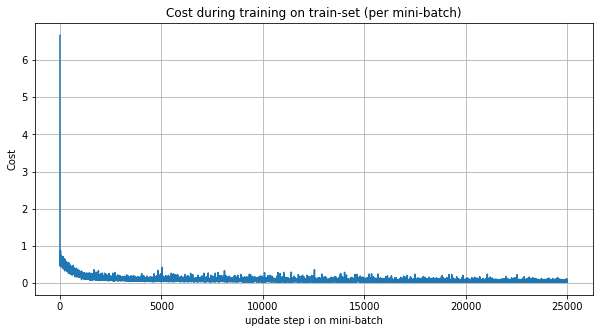

Final cost: 0.0293


In [24]:
training(model, my_dataloader, nn.MSELoss(), 0.001, 5000)

In [25]:
with torch.no_grad():
  y_preds = model(X)

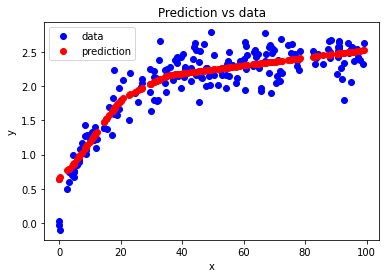

In [26]:
plot_prediction(X, y_obs, y_preds)

#Task B: 2-variable regression - using FANNs to fit data drawn from a bell curve.

In [27]:
N = 1000
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

my_dataset = TensorDataset(x, y) 
my_dataloader = DataLoader(my_dataset, batch_size=int(0.1*N), shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  


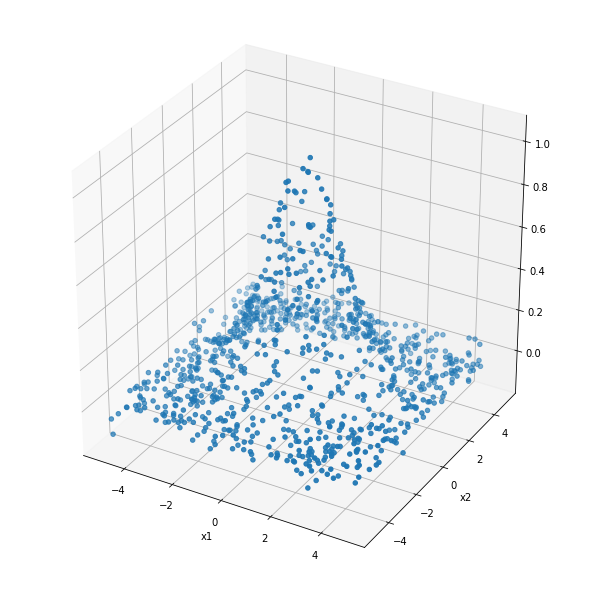

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)
ax = Axes3D(fig)
ax.scatter(x[:,0], x[:,1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()

Architecture I: 2-10-1 -> number of parameters: (2+1)x10 + (10+1)x1 = 41

Architecture II: 2-50-1 -> number of parameters: (2+1)x50 + (50+1)x1 = 201

Architecture III: 2-300-1 -> number of parameters: (2+1)x300 + (300+1)x1 = 1201

Architecture IV: 2-100-20-5-1 -> number of parameters: (2+1)x100 + (100+1)x20 + (20+1)x5 + (5+1)x1 = 2431

Architecture V: 2-300-100-20-1 -> number of parameters: (2+1)x300 + (300+1)x100 + (100+1)x20 + (20+1)x1 = 33041

In [29]:
def plot_prediction(trained_model):
  x1 = torch.linspace(start=-5, end=5, steps=100)
  x2 = torch.linspace(start=-5, end=5, steps=100)
  X, Y = torch.meshgrid(x1, x2)

  s = torch.stack([X.ravel(), Y.ravel()]).T # all grid coordinates for region.

  with torch.no_grad():
    y_preds = trained_model(s) # making predictions on surface grid to get surface values.
  
  # 3D surface plotting
  fig = plt.figure()
  fig.set_figwidth(8)
  fig.set_figheight(8)

  ax = Axes3D(fig)
  ax.scatter(x[:,0], x[:,1], y, label='data')
  ax.scatter(s[:,0], s[:,1], y_preds, label='prediction')
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  plt.legend()
  plt.show()

In [30]:
# Architecture 1
model1 = nn.Sequential(
  nn.Linear(in_features=2, out_features=10),
  nn.ReLU(),
  nn.Linear(in_features=10, out_features=1),
  )

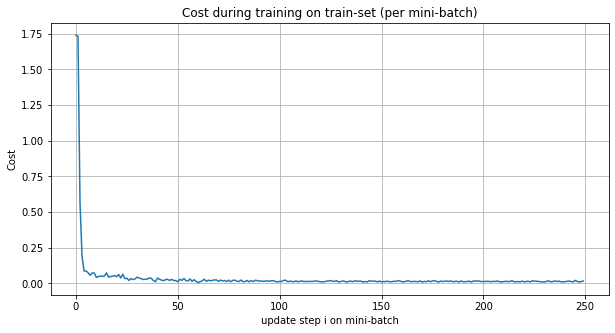

Final cost: 0.0176


/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


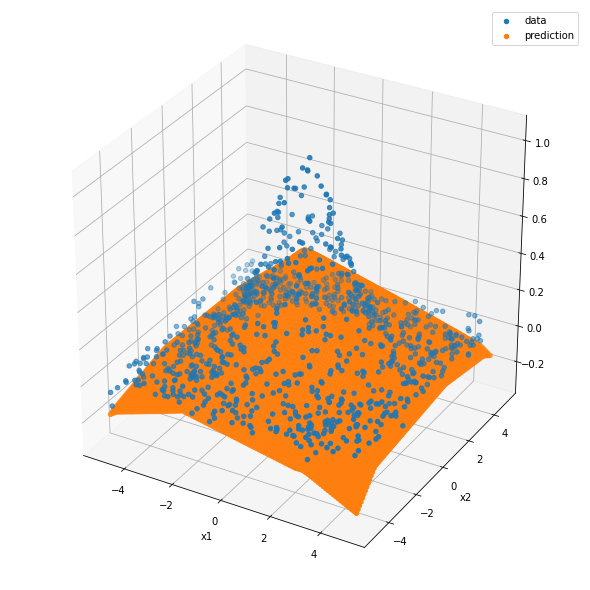

In [31]:
# model1 with N=1000
training(model1, my_dataloader, nn.MSELoss(), 0.1, 25)
plot_prediction(model1)

In [32]:
# Architecture 2
model2 = nn.Sequential(
  nn.Linear(in_features=2, out_features=50),
  nn.ReLU(),
  nn.Linear(in_features=50, out_features=1),
  )

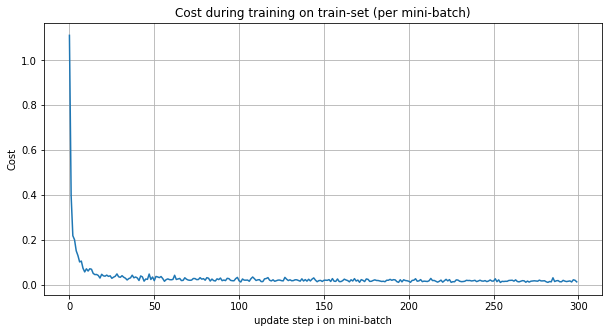

Final cost: 0.0126


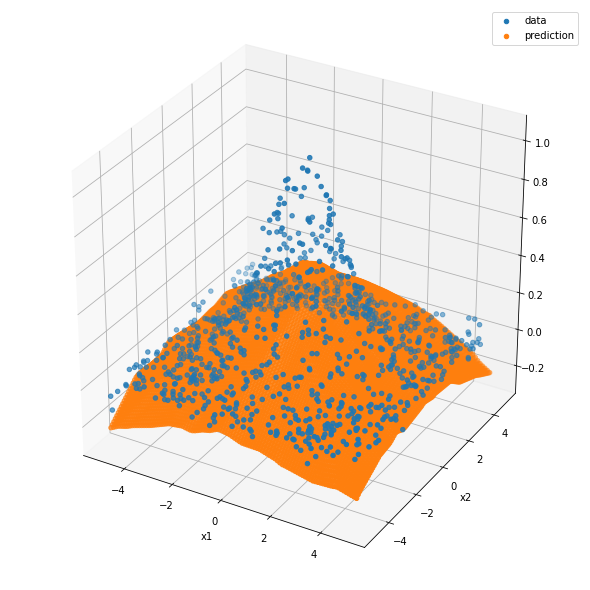

In [33]:
# model2 with N=1000
training(model2, my_dataloader, nn.MSELoss(), 0.01, 30)
plot_prediction(model2)

In [34]:
# Architecture 3
model3 = nn.Sequential(
  nn.Linear(in_features=2, out_features=300),
  nn.ReLU(),
  nn.Linear(in_features=300, out_features=1),
  )

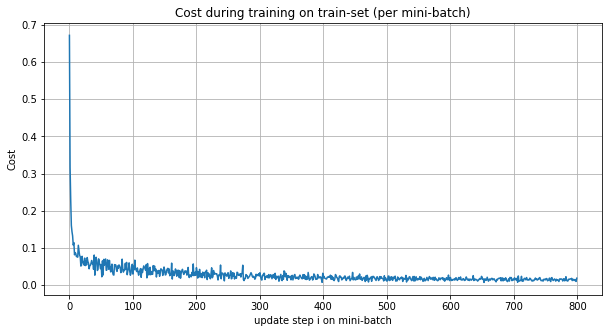

Final cost: 0.0186


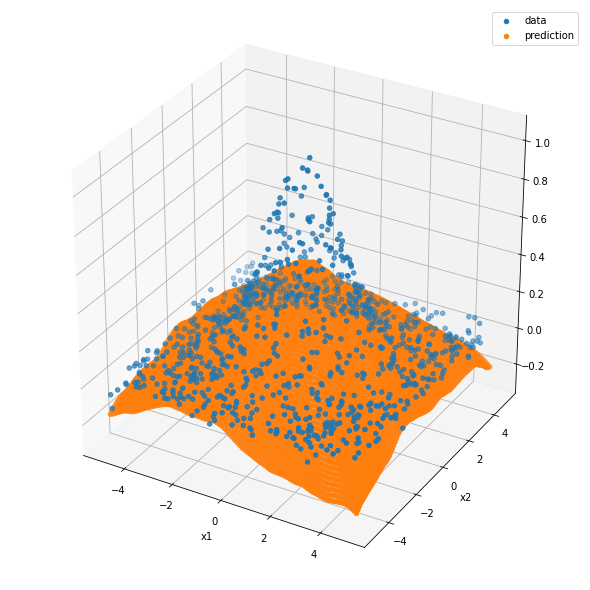

In [35]:
# model3 with N=1000
training(model3, my_dataloader, nn.MSELoss(), 0.001, 80)
plot_prediction(model3)

In [36]:
# Architecture 4
model4 = nn.Sequential(
  nn.Linear(in_features=2, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=20),
  nn.ReLU(),
  nn.Linear(in_features=20, out_features=5),
  nn.ReLU(),
  nn.Linear(in_features=5, out_features=1),
  )

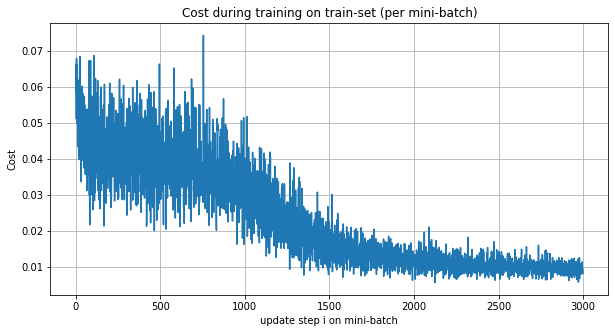

Final cost: 0.0082


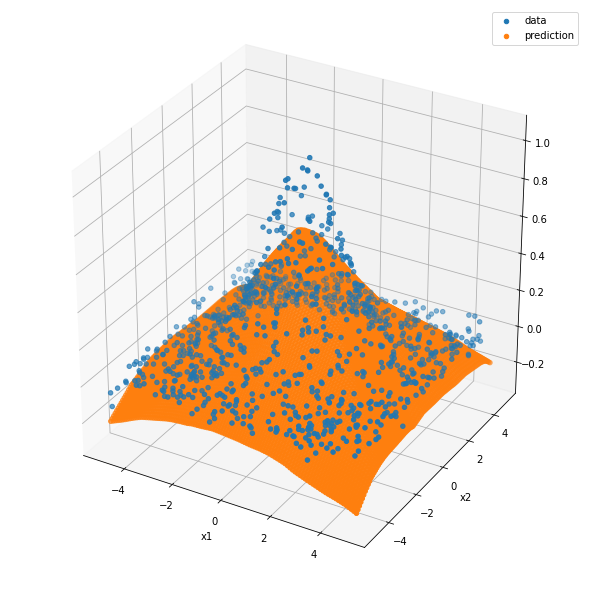

In [37]:
# model4 with N=1000
training(model4, my_dataloader, nn.MSELoss(), 0.01, 300)
plot_prediction(model4)

In [38]:
# Architecture 5
model5 = nn.Sequential(
  nn.Linear(in_features=2, out_features=300),
  nn.ReLU(),
  nn.Linear(in_features=300, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=20),
  nn.ReLU(),
  nn.Linear(in_features=20, out_features=1),
  )

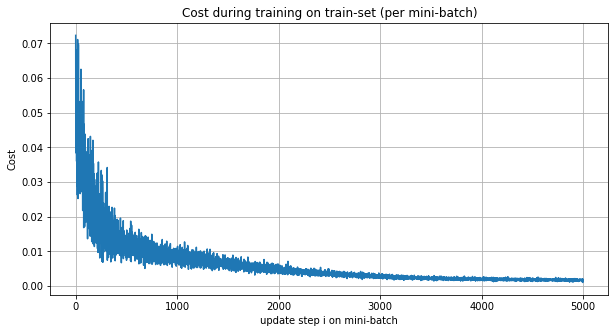

Final cost: 0.0018


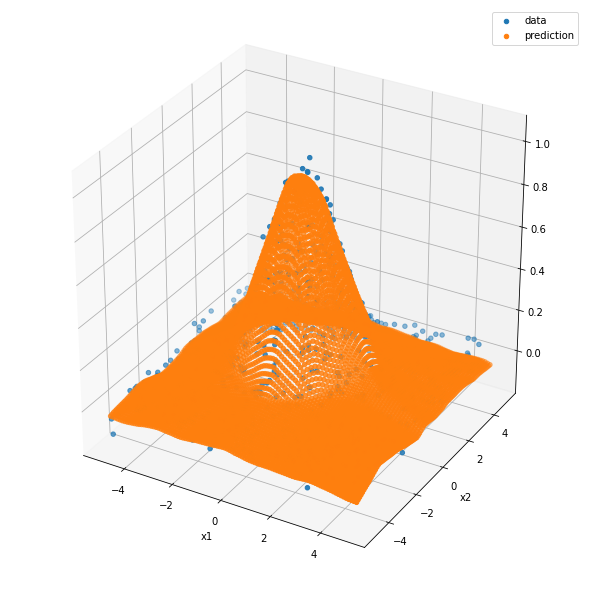

In [39]:
# model5 with N=1000
training(model5, my_dataloader, nn.MSELoss(), 0.01, 500)
plot_prediction(model5)

Model 5 seems to be the one performing better. This model has the lowest final cost and it can be seen in the prediction plot how this model is the one adapting better to the data.

In [40]:
N = 50
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

my_dataset = TensorDataset(x, y) 
my_dataloader = DataLoader(my_dataset, batch_size=int(0.2*N), shuffle=True)

In [41]:
# Architecture 1
model1 = nn.Sequential(
  nn.Linear(in_features=2, out_features=10),
  nn.ReLU(),
  nn.Linear(in_features=10, out_features=1),
  )

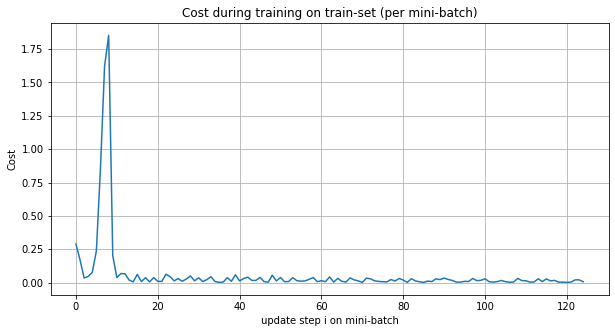

Final cost: 0.0064


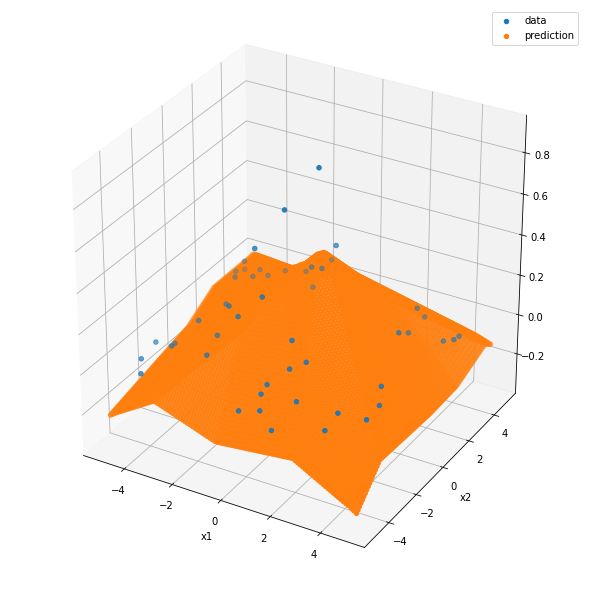

In [42]:
# model1 with N=50
training(model1, my_dataloader, nn.MSELoss(), 0.1, 25)
plot_prediction(model1)

In [43]:
# Architecture 5
model5 = nn.Sequential(
  nn.Linear(in_features=2, out_features=300),
  nn.ReLU(),
  nn.Linear(in_features=300, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=20),
  nn.ReLU(),
  nn.Linear(in_features=20, out_features=1),
  )

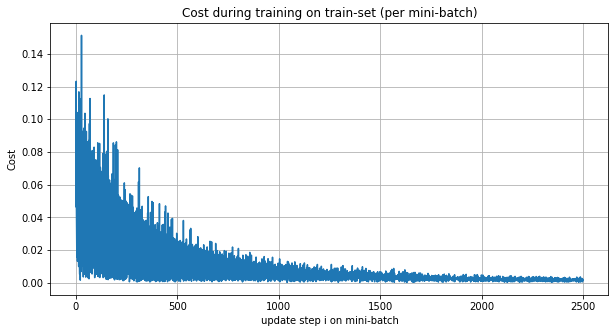

Final cost: 0.0018


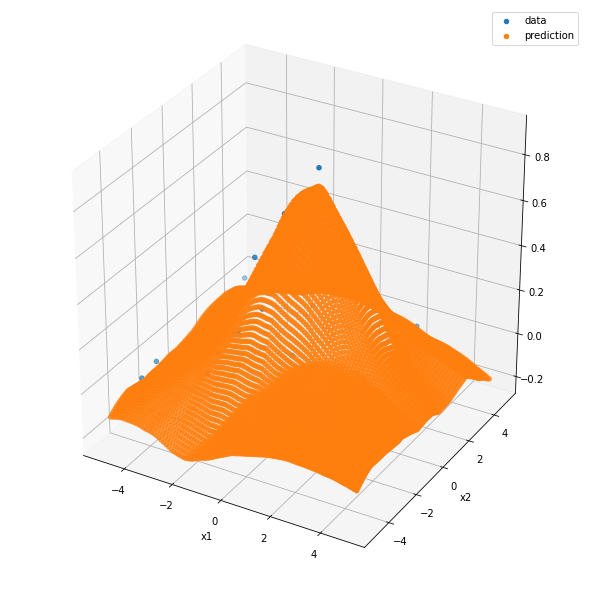

In [44]:
# model5 with N=50
training(model5, my_dataloader, nn.MSELoss(), 0.01, 500)
plot_prediction(model5)

In [45]:
N = 10000
x = 10*torch.rand(size=[N,2]) - 5
mean_true = torch.tensor([0.0, 0.0])
y = torch.zeros(N).reshape(-1,1)
for i in range(len(x)):
  y[i] = torch.exp(-((x[i,:]-mean_true).T@(x[i,:]-mean_true))/4) + 0.04*torch.randn(1)

In [46]:
# Architecture 1
model1 = nn.Sequential(
  nn.Linear(in_features=2, out_features=10),
  nn.ReLU(),
  nn.Linear(in_features=10, out_features=1),
  )

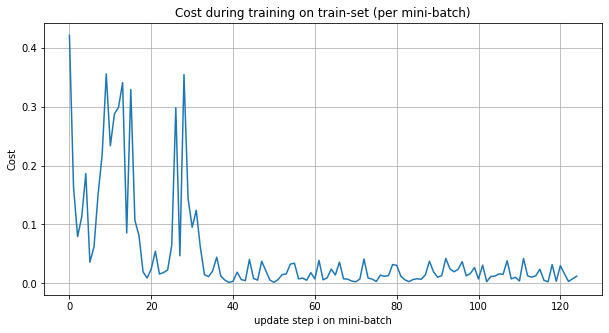

Final cost: 0.012


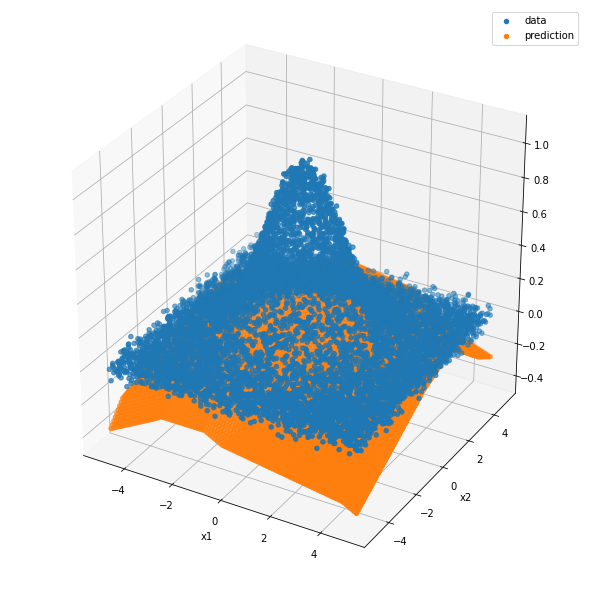

In [47]:
# model1 with N=10000
training(model1, my_dataloader, nn.MSELoss(), 0.1, 25)
plot_prediction(model1)

In [48]:
# Architecture 5
model5 = nn.Sequential(
  nn.Linear(in_features=2, out_features=300),
  nn.ReLU(),
  nn.Linear(in_features=300, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=20),
  nn.ReLU(),
  nn.Linear(in_features=20, out_features=1),
  )

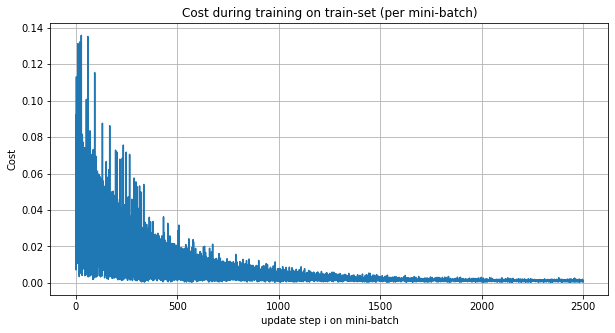

Final cost: 0.0004


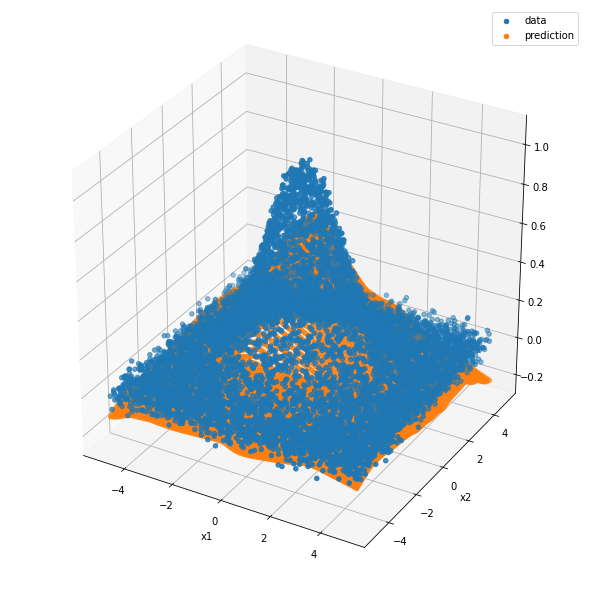

In [49]:
# model5 with N=10000
training(model5, my_dataloader, nn.MSELoss(), 0.01, 500)
plot_prediction(model5)

Knowing the underlying function of the data we could choose a simpler model than model 5 and achieve a good result with a proper training. If we don't know the underlying function of the data it would be a better option to choose model 5 which has a high complexity and can adapt to more functions.


Ideally, we should have 10 times more data than the number of parameters.

#Task C: Signal Classification with FANN

In [50]:
cd /content/drive/MyDrive/datasets/assignment_nn_material

/content/drive/MyDrive/datasets/assignment_nn_material


In [51]:
import assignment_ann as a4
signal_dataset = a4.SignalDataset() # Provides back a PyTorch Dataset OBJECT!
size_of_signal_dataset = len(signal_dataset) # Print size of whole dataset
print(f'Dataset size: {size_of_signal_dataset}')

# Making a PyTorch DataLoader Object specifically for your Signal dataset that you got above.
signal_dataloader = DataLoader(dataset=signal_dataset, batch_size=int(0.1*size_of_signal_dataset), shuffle=True)

Dataset size: 1384


In [52]:
# Check length of one signal
subset_indices = [0]
subset = torch.utils.data.Subset(signal_dataset, subset_indices)
sample_dataloader = DataLoader(subset, batch_size=1)
for X_batch, y_batch in sample_dataloader:
  print(f'Sample size: {X_batch.shape[1]}')

Sample size: 500


In [53]:
# Plot two signals
subset_indices = [0, 1]
subset = torch.utils.data.Subset(signal_dataset, subset_indices)
sample_dataloader = DataLoader(subset, batch_size=2)
# Make sure there is is one normal: y=0 and one abnormal: y=1
for X_batch, y_batch in sample_dataloader:
  print(y_batch)

tensor([0, 1])


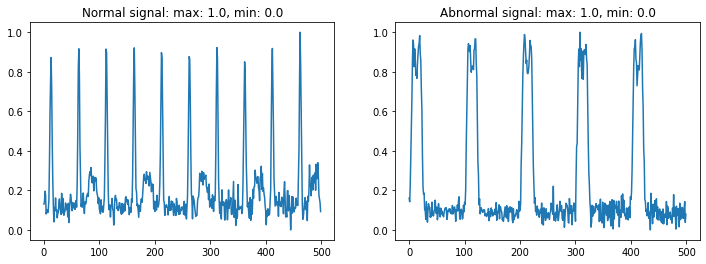

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax1.plot(X_batch[0, :])
ax1.set_title('Normal signal: max: 1.0, min: 0.0')
ax2.plot(X_batch[1, :])
ax2.set_title('Abnormal signal: max: 1.0, min: 0.0')
plt.show()

The difference with respect to the plot in the instructions is the number of points where the singal is evaluated, this is, the size of the input vector.

In [55]:
model = nn.Sequential(
  nn.Linear(in_features=500, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=50),
  nn.ReLU(),
  nn.Linear(in_features=50, out_features=2),
  )

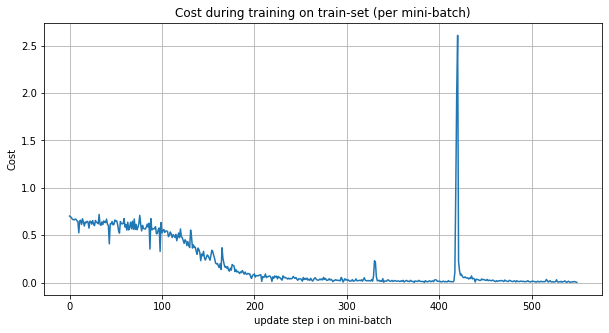

Final cost: 0.0024


In [56]:
training(model, signal_dataloader, nn.CrossEntropyLoss(), 0.1, 50)

In [57]:
# Specify split fractions:
train_fraction = 0.70
val_fraction = 0.20
test_fraction = 0.10 

# Determine size of each set
train_dataset_size = int(train_fraction * size_of_signal_dataset)
val_dataset_size = int(val_fraction * size_of_signal_dataset)
test_dataset_size = int(size_of_signal_dataset - train_dataset_size - val_dataset_size)

# Split whole original data into train, val and test datsets
train_dataset, val_dataset, test_dataset = random_split(signal_dataset, [train_dataset_size, val_dataset_size, test_dataset_size])

In [58]:
# Sanity check
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test data size: {len(test_dataset)}")
assert train_dataset_size + val_dataset_size + test_dataset_size == size_of_signal_dataset, 'Should be equal'

Train set size: 968
Validation set size: 276
Test data size: 140


In [59]:
def evaluate_model_performance(dataset, model):
  # Function that takes in a model and a dataset
  # and outputs an performance estimate of the classification
  # accuracy of the model.

  # Make a Dataloader for the dataset.
  # Note, we are not performing any SGD here, so our batch
  # size is the whole # dataset we want to evaluate model performance on.
  data_loader = DataLoader(dataset = dataset, batch_size=len(dataset))

  cost_function = nn.CrossEntropyLoss() # For classification evaluation
  model.eval() # set model to evaluation mode
  # Make predictions for the eval dataset
  with torch.no_grad():
    for X, y in data_loader:
      raw_y_preds = model(X)

  y_class_preds = raw_y_preds.argmax(dim=1)
  eval_cost = cost_function(raw_y_preds, y).item()
  model.train() # set model to training mode

  # compare predictions with true labels and compute performance metric
  # performance metric in this example is classification accuracy
  eval_acc = accuracy_score(y_pred = y_class_preds, y_true = y)

  return eval_cost, eval_acc

In [60]:
# Reset model
model = nn.Sequential(
  nn.Linear(in_features=500, out_features=100),
  nn.ReLU(),
  nn.Linear(in_features=100, out_features=50),
  nn.ReLU(),
  nn.Linear(in_features=50, out_features=2),
  )

In [61]:
def training(model, train_dataset, val_dataset, cost_function, batch_size_perc, lr, nr_epochs, eval_every_kth):
  # Training neural networks in PyTorch
  optim = torch.optim.SGD(model.parameters(), lr)
  training_minibatch_cost = []
  train_cost_list = []
  train_acc_list = []
  val_cost_list = []
  val_acc_list = []

  train_dataloader = DataLoader(dataset=train_dataset, batch_size=int(batch_size_perc*len(train_dataset)), shuffle=True)

  # Iterate through whole dataset nr_epochs times and evaluate repeatedly
  for epoch_i in range(nr_epochs+1): 

    model.eval() # evaluation mode
    train_cost, train_acc = evaluate_model_performance(model=model, dataset=train_dataset) 
    val_cost, val_acc = evaluate_model_performance(model=model, dataset=val_dataset) 
    model.train() # training mode
    train_cost_list.append(train_cost)
    train_acc_list.append(train_acc)
    val_cost_list.append(val_cost)
    val_acc_list.append(val_acc)
    
    # Keep track of performance measures from both training and vallidation datasets
    if epoch_i % eval_every_kth == 0:
      print(f"Epoch:{epoch_i}, Train cost: {train_cost}, - Train Accuracy: {train_acc}")
      print(f"Epoch:{epoch_i}, Validation cost: {val_cost}, - Validation Accuracy: {val_acc}\n-------")

    for X_batch, y_batch in train_dataloader:
      y_preds = model(X_batch) # batch prediction
      cost = cost_function(y_preds, y_batch) # compute cost
      training_minibatch_cost.append(cost.item()) # save cost
      optim.zero_grad() # set grads to zero of all model params
      cost.backward() # accumulate gradient of all model params
      optim.step() # update step for all model params

  return train_cost_list, train_acc_list, val_cost_list, val_acc_list, training_minibatch_cost

In [62]:
train_cost_list, train_acc_list, val_cost_list, val_acc_list, training_minibatch_cost = \
training(model, train_dataset, val_dataset, cost_function=nn.CrossEntropyLoss(), batch_size_perc=0.1, lr=0.05, nr_epochs=30, eval_every_kth=5)

Epoch:0, Train cost: 0.6802989840507507, - Train Accuracy: 0.6549586776859504
Epoch:0, Validation cost: 0.6815795302391052, - Validation Accuracy: 0.6413043478260869
-------
Epoch:5, Train cost: 0.6155835390090942, - Train Accuracy: 0.6549586776859504
Epoch:5, Validation cost: 0.6274099946022034, - Validation Accuracy: 0.6413043478260869
-------
Epoch:10, Train cost: 0.5651921629905701, - Train Accuracy: 0.6549586776859504
Epoch:10, Validation cost: 0.5794346332550049, - Validation Accuracy: 0.6413043478260869
-------
Epoch:15, Train cost: 0.46423837542533875, - Train Accuracy: 0.6962809917355371
Epoch:15, Validation cost: 0.48052701354026794, - Validation Accuracy: 0.6847826086956522
-------
Epoch:20, Train cost: 0.3198578953742981, - Train Accuracy: 0.9700413223140496
Epoch:20, Validation cost: 0.33579763770103455, - Validation Accuracy: 0.9637681159420289
-------
Epoch:25, Train cost: 0.18090590834617615, - Train Accuracy: 0.9865702479338843
Epoch:25, Validation cost: 0.199359834194

In [63]:
def evaluation_plot(train_cost_list, train_acc_list, val_cost_list, val_acc_list):
  # Function for plotting the model evaluation and accuracy 
  fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
  fig.set_size_inches(10, 8)
  plt.subplots_adjust(hspace=0.3) # set the spacing between subplots

  ax1.plot(train_cost_list, label='Train set')
  ax1.plot(val_cost_list, label='Validation set')
  ax1.set_title('Eval: Cross-entropy cost troughout training')
  ax1.set_xlabel('epochs')
  ax1.set_ylabel('Cross-Entropy cost')
  ax1.grid()
  ax1.legend()

  ax2.plot(train_acc_list, label='Train set')
  ax2.plot(val_acc_list, label='Validation set')
  ax2.set_title('Accuracy performance throughout training')
  ax2.set_xlabel('epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  fig.show()

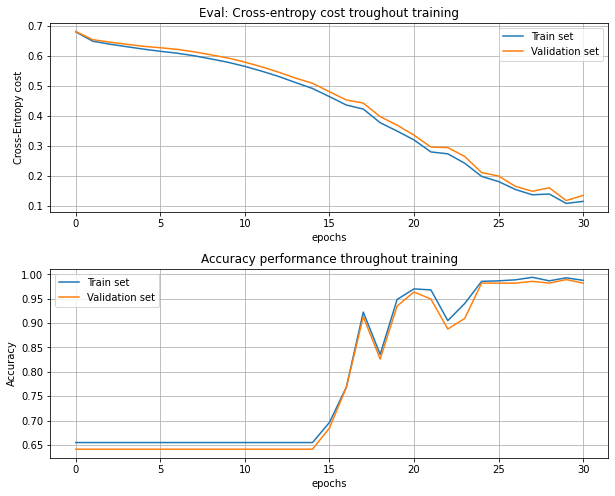

In [64]:
evaluation_plot(train_cost_list, train_acc_list, val_cost_list, val_acc_list)

#Task D: Image Classification of FashionMNIST using FANNs

In [65]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
root="data",
train=True,
download=True,
transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
root="data",
train=False,
download=True,
transform=ToTensor(),
)

In [66]:
# Split training data into training and validation data
data =  training_data
data_size = len(data)

# Specify split fractions
train_fraction = 0.8
val_fraction = 0.2

# Determine size of each set
train_dataset_size = int(train_fraction * data_size)
val_dataset_size = data_size - train_dataset_size

train_dataset, val_dataset = random_split(data, [train_dataset_size, val_dataset_size])

In [67]:
# Sanity check
print(f"Train set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
assert train_dataset_size + val_dataset_size == data_size, 'Should be equal'
print(f"Test data size: {len(test_data)}")

Train set size: 48000
Validation set size: 12000
Test data size: 10000


In [68]:
# ANN architecture
model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(in_features=784, out_features=256),
  nn.ReLU(),
  nn.Linear(in_features=256, out_features=128),
  nn.ReLU(),
  nn.Linear(in_features=128, out_features=64),
  nn.ReLU(),
  nn.Linear(in_features=64, out_features=10)
  )

In [69]:
train_cost_list, train_acc_list, val_cost_list, val_acc_list, training_minibatch_cost = \
training(model, train_dataset, val_dataset, cost_function=nn.CrossEntropyLoss(), batch_size_perc=0.1, lr=0.1, nr_epochs=50, eval_every_kth=5)

Epoch:0, Train cost: 2.30625581741333, - Train Accuracy: 0.0999375
Epoch:0, Validation cost: 2.3060848712921143, - Validation Accuracy: 0.10033333333333333
-------
Epoch:5, Train cost: 1.954437494277954, - Train Accuracy: 0.3706875
Epoch:5, Validation cost: 1.9531883001327515, - Validation Accuracy: 0.36533333333333334
-------
Epoch:10, Train cost: 1.2535486221313477, - Train Accuracy: 0.48652083333333335
Epoch:10, Validation cost: 1.2501111030578613, - Validation Accuracy: 0.4870833333333333
-------
Epoch:15, Train cost: 0.9373130798339844, - Train Accuracy: 0.6370208333333334
Epoch:15, Validation cost: 0.9328707456588745, - Validation Accuracy: 0.6351666666666667
-------
Epoch:20, Train cost: 0.7751473188400269, - Train Accuracy: 0.6994791666666667
Epoch:20, Validation cost: 0.7650874257087708, - Validation Accuracy: 0.7016666666666667
-------
Epoch:25, Train cost: 0.7710304260253906, - Train Accuracy: 0.71975
Epoch:25, Validation cost: 0.7561325430870056, - Validation Accuracy: 0.72

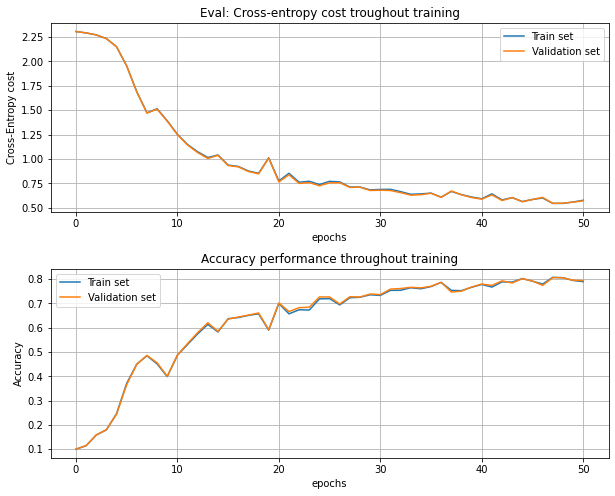

In [70]:
evaluation_plot(train_cost_list, train_acc_list, val_cost_list, val_acc_list)

In [71]:
codified_labels = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

In [72]:
dataloader = DataLoader(dataset=data, batch_size=int(0.1*data_size), shuffle=True)

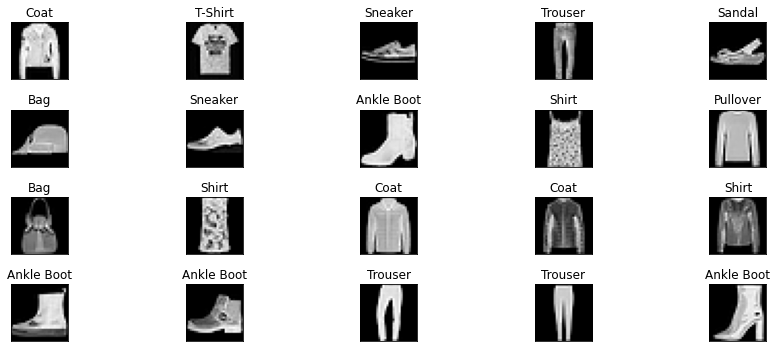

In [73]:
# Visualize data
dataiter = iter(dataloader)
images, labels = dataiter.next()

fig = plt.figure(figsize=(15,5))
for idx in np.arange(20):
  ax = fig.add_subplot(4, 20/4, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')
  ax.set_title(codified_labels[labels[idx].item()])
  fig.tight_layout()

In [74]:
# Evaluate the model on test data
test_cost, test_acc = evaluate_model_performance(model=model, dataset=test_data)
print(f'Test Cross-Entropy cost: {test_cost}')
print(f'Test accuracy: {test_acc}')

Test Cross-Entropy cost: 0.5628864765167236
Test accuracy: 0.7939


In [75]:
test_dataloader = DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=True)

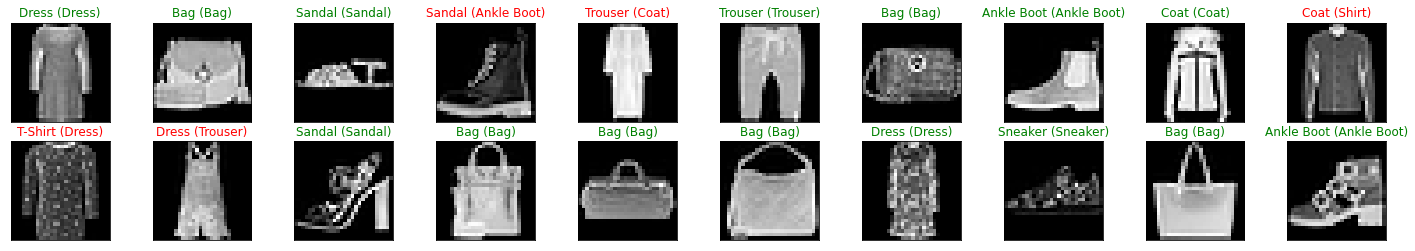

In [76]:
#Use the classifier on test data
dataiter = iter(test_dataloader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
  ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(images[idx]), cmap='gray')

  predicted_label = codified_labels[preds[idx].item()]
  true_label = codified_labels[labels[idx].item()]

  ax.set_title("{} ({})".format(predicted_label, true_label),
              color=("green" if preds[idx]==labels[idx] else "red"))

###Applications of image classification

1) Identify the gender, age group of the visitors in the physical store for the marketing

2) Identify the humans with the image processing in the camera and count the number of people in the public transportation, bus, or store for the covid regulations

3) Identify cancerous moles

#Task E∗: CNN classification of FashionMNIST

Reference: https://blog.paperspace.com/writing-lenet5-from-scratch-in-python/

In [77]:
import torchvision.transforms as transforms

In [78]:
# Define relevant variables for the ML task
batch_size = 64
num_classes = 10
learning_rate = 0.01
num_epochs = 10

# Device will determine whether to run the training on GPU or CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [79]:
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

# Calculate the mean and standard deviation for the training data

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(training_data.data.min(), training_data.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(training_data.data.float().mean(), training_data.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(training_data.data.float().mean() / 255, training_data.data.float().std() / 255))

# Calculate the mean and standard deviation for the test data

print('Min Pixel Value: {} \nMax Pixel Value: {}'.format(test_data.data.min(), test_data.data.max()))
print('Mean Pixel Value {} \nPixel Values Std: {}'.format(test_data.data.float().mean(), test_data.data.float().std()))
print('Scaled Mean Pixel Value {} \nScaled Pixel Values Std: {}'.format(test_data.data.float().mean() / 255, test_data.data.float().std() / 255))

Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 72.94035339355469 
Pixel Values Std: 90.02118682861328
Scaled Mean Pixel Value 0.28604060411453247 
Scaled Pixel Values Std: 0.35302427411079407
Min Pixel Value: 0 
Max Pixel Value: 255
Mean Pixel Value 73.14656066894531 
Pixel Values Std: 89.8732681274414
Scaled Mean Pixel Value 0.2868492603302002 
Scaled Pixel Values Std: 0.35244420170783997


In [80]:
# Download training data from open datasets and resize the input to be the input to be 32x32
train_dataset = datasets.FashionMNIST(root = './data',
                                           train = True,
                                           transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.2860,), std = (0.3530,))]),
                                           download = True)

# Download test data from open datasets.
test_dataset = datasets.FashionMNIST(root = './data',
                                          train = False,
                                          transform = transforms.Compose([
                                                  transforms.Resize((32,32)),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean = (0.2868,), std = (0.3524,))]),
                                          download=True)

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)


test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = True)

In [81]:
# Defining the convolutional neural network
class LeNet5(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [82]:
model = LeNet5(num_classes).to(device)

#Setting the loss function
cost = nn.CrossEntropyLoss()

#Setting the optimizer with the model parameters and learning rate
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

#this is defined to print how many steps are remaining when training
total_step = len(train_loader)

In [83]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.to(device)
        labels = labels.to(device)
        
        #Forward pass
        outputs = model(images)
        loss = cost(outputs, labels)
        	
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        		
        if (i+1) % 400 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
        		           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/10], Step [400/938], Loss: 0.7650
Epoch [1/10], Step [800/938], Loss: 0.5914
Epoch [2/10], Step [400/938], Loss: 0.4824
Epoch [2/10], Step [800/938], Loss: 0.4226
Epoch [3/10], Step [400/938], Loss: 0.2765
Epoch [3/10], Step [800/938], Loss: 0.3734
Epoch [4/10], Step [400/938], Loss: 0.4559
Epoch [4/10], Step [800/938], Loss: 0.3263
Epoch [5/10], Step [400/938], Loss: 0.2230
Epoch [5/10], Step [800/938], Loss: 0.2356
Epoch [6/10], Step [400/938], Loss: 0.2359
Epoch [6/10], Step [800/938], Loss: 0.3319
Epoch [7/10], Step [400/938], Loss: 0.3638
Epoch [7/10], Step [800/938], Loss: 0.2684
Epoch [8/10], Step [400/938], Loss: 0.3448
Epoch [8/10], Step [800/938], Loss: 0.3259
Epoch [9/10], Step [400/938], Loss: 0.2478
Epoch [9/10], Step [800/938], Loss: 0.3452
Epoch [10/10], Step [400/938], Loss: 0.2621
Epoch [10/10], Step [800/938], Loss: 0.4044


In [84]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
  
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 88.17 %


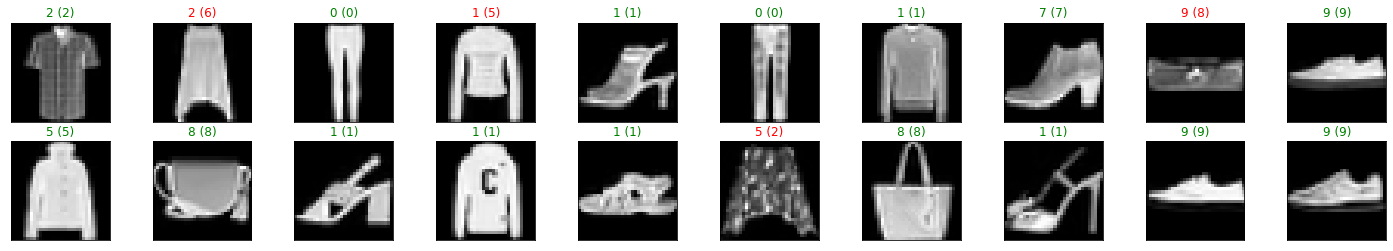

In [85]:
#Use the classifier
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')

    predicted_label=labels[preds[idx].item()]
    true_label=labels[labels[idx].item()]

    ax.set_title("{} ({})".format(predicted_label, true_label),
                 color=("green" if preds[idx]==labels[idx] else "red"))

a) It is a dataset of 60,000 small square 28×28 pixel. Kernel size in Le-net5 is 5x5.

b) Input is resized to be 32x32.

c) Applied in the code.

d) Accuracy is 88.46%